# Temporal-Difference Methods

In this notebook, you will write your own implementations of many Temporal-Difference (TD) methods.

While we have provided some starter code, you are welcome to erase these hints and write your code from scratch.

---

### Part 0: Explore CliffWalkingEnv

We begin by importing the necessary packages.

In [3]:
import sys
import gym
import numpy as np
from collections import defaultdict, deque
import matplotlib.pyplot as plt
%matplotlib inline


sys.path.append('temporal-difference/')
import check_test
from plot_utils import plot_values

Use the code cell below to create an instance of the [CliffWalking](https://github.com/openai/gym/blob/master/gym/envs/toy_text/cliffwalking.py) environment.

In [4]:
env = gym.make('CliffWalking-v0')

The agent moves through a $4\times 12$ gridworld, with states numbered as follows:
```
[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]]
```
At the start of any episode, state `36` is the initial state.  State `47` is the only terminal state, and the cliff corresponds to states `37` through `46`.

The agent has 4 potential actions:
```
UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3
```

Thus, $\mathcal{S}^+=\{0, 1, \ldots, 47\}$, and $\mathcal{A} =\{0, 1, 2, 3\}$.  Verify this by running the code cell below.

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


In this mini-project, we will build towards finding the optimal policy for the CliffWalking environment.  The optimal state-value function is visualized below.  Please take the time now to make sure that you understand _why_ this is the optimal state-value function.

_**Note**: You can safely ignore the values of the cliff "states" as these are not true states from which the agent can make decisions.  For the cliff "states", the state-value function is not well-defined._

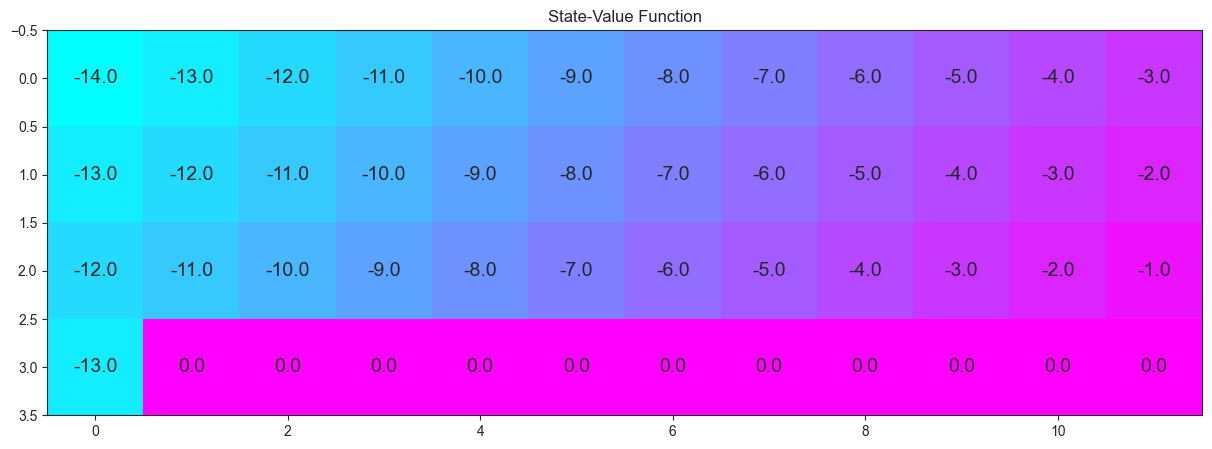

In [6]:
# define the optimal state-value function
V_opt = np.zeros((4,12))
V_opt[0:13][0] = -np.arange(3, 15)[::-1]
V_opt[0:13][1] = -np.arange(3, 15)[::-1] + 1
V_opt[0:13][2] = -np.arange(3, 15)[::-1] + 2
V_opt[3][0] = -13

plot_values(V_opt)

### Part 1: TD Control: Sarsa

In this section, you will write your own implementation of the Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [166]:
def update_Qsa_sarsa(alpha, gamma, Q, state, action, reward, next_state=None, next_action=None):
    """Returns updated Q-value for the most recent experience."""
    # get current Q-value (for current state, action pair)
    current = Q[state][action]
    # get value of next state
    Qsa_next = Q[next_state][next_action] if next_state is not None else 0
    # compute update
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    # return updated Q-value for current state and action pair
    return new_value

def e_greedy_policy(Q, epsilon, state, action_space):
    """Selects epsilon-greedy action for supplied state."""
    # get number of actions available in the environment
    nA = action_space.n
    # set the probability for taking a random action 
    policy_s = np.ones(nA) * epsilon / nA
    # set the probability for taking the best action
    try:
        policy_s[np.argmax(Q[state])] = 1 - epsilon + (epsilon / nA)
    except:
        policy_s = np.ones(nA) / nA
    # return policy
    return policy_s

import random
def epsilon_greedy(Q, state, nA, eps):
    """Selects epsilon-greedy action for supplied state.
    
    Params
    ======
        Q (dictionary): action-value function
        state (int): current state
        nA (int): number actions in the environment
        eps (float): epsilon
    """
    if random.random() > eps: # select greedy action with probability epsilon
        return np.argmax(Q[state])
    else:                     # otherwise, select an action randomly
        return random.choice(np.arange(env.action_space.n))


In [167]:
def sarsa(env, num_episodes, alpha, eps_start=1.0, eps_decay=0.99, eps_min=0.001, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # for state in range(env.nS):
    #     for action in range(env.nA):
    #         Q[state][action] = 0
    # initialize performance monitor
    # loop over episodes
    epsilon = eps_start
    for i_episode in range(1, num_episodes+1):
        episode = []
        epsilon = max(epsilon * eps_decay, eps_min)
        reward = 0
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        
        state, _ = env.reset()
        action = epsilon_greedy(Q, state, env.nA, epsilon)
        episode.append((state, action, reward))
        while True:
            next_state, reward, done, info, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, env.nA, epsilon)
            episode.append((next_state, next_action, reward))
            Q[state][action] = update_Qsa_sarsa(alpha, gamma, Q, state, action, reward, next_state, next_action)
            state = next_state
            action = next_action
            if done:
                break
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 30000/30000

**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0  0  0  1  1  1  1  1  1  1  1  2]
 [ 0  0  0  0  0  0  0  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


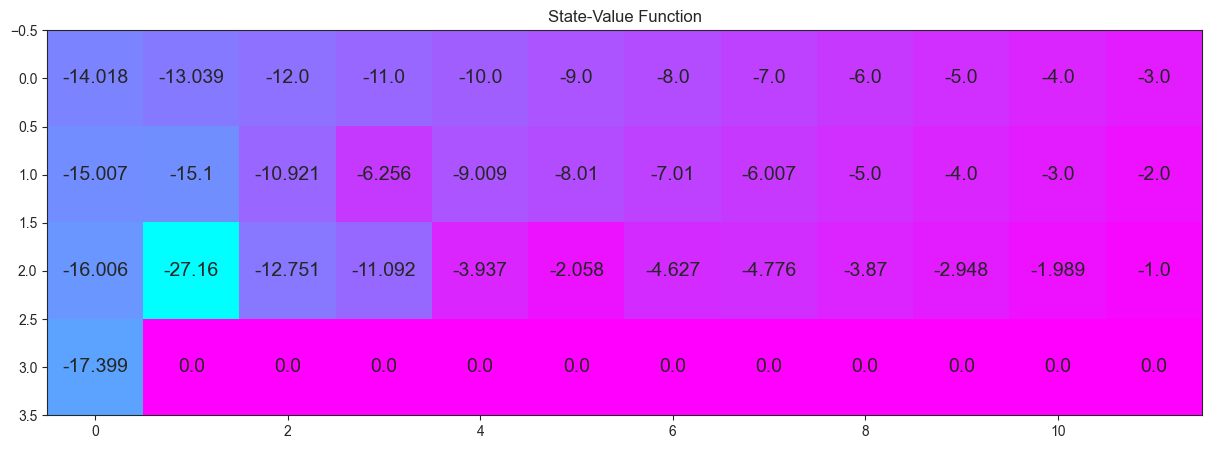

In [169]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsa = sarsa(env, 30000, .01)

# print the estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)

### Part 2: TD Control: Q-learning

In this section, you will write your own implementation of the Q-learning control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [128]:
def update_Qsa_qlearning(alpha, gamma, Q, state, action, reward, next_state=None):
    """Returns updated Q-value for the most recent experience."""
    # get current Q-value (for current state, action pair)
    current = Q[state][action]
    # max in Q[state]
    Qsa_next = np.max(Q[next_state]) if next_state is not None else 0
    # compute update
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    # return updated Q-value for current state and action pair
    return new_value

In [143]:
def q_learning(env, num_episodes, alpha, eps_start=1.0, eps_decay=0.99, eps_min=0.1, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    for state in range(env.nS):
        for action in range(env.nA):
            Q[state][action] = 0
    # initialize performance monitor
    # loop over episodes
    epsilon = eps_start
    for i_episode in range(1, num_episodes+1):
        episode = []
        epsilon = max(epsilon * eps_decay, eps_min)
        reward = 0
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        
        state, _ = env.reset()
        action = np.random.choice(np.arange(env.nA), p=e_greedy_policy(Q, epsilon, state, env.action_space))
        episode.append((state, action, reward))
        while True:
            next_state, reward, done, info, _ = env.step(action)
            Q[state][action] = update_Qsa_qlearning(alpha, gamma, Q, state, action, reward, next_state)
            next_action =  np.random.choice(np.arange(env.nA), p=e_greedy_policy(Q, epsilon, next_state, env.action_space))
            episode.append((next_state, next_action, reward))
            state = next_state
            action = next_action
            if done:
                break
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function. 

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 5000/5000

**<span style="color: green;">PASSED</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[0 1 0 1 3 1 1 1 1 1 1 2]
 [0 1 3 1 0 1 1 1 2 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


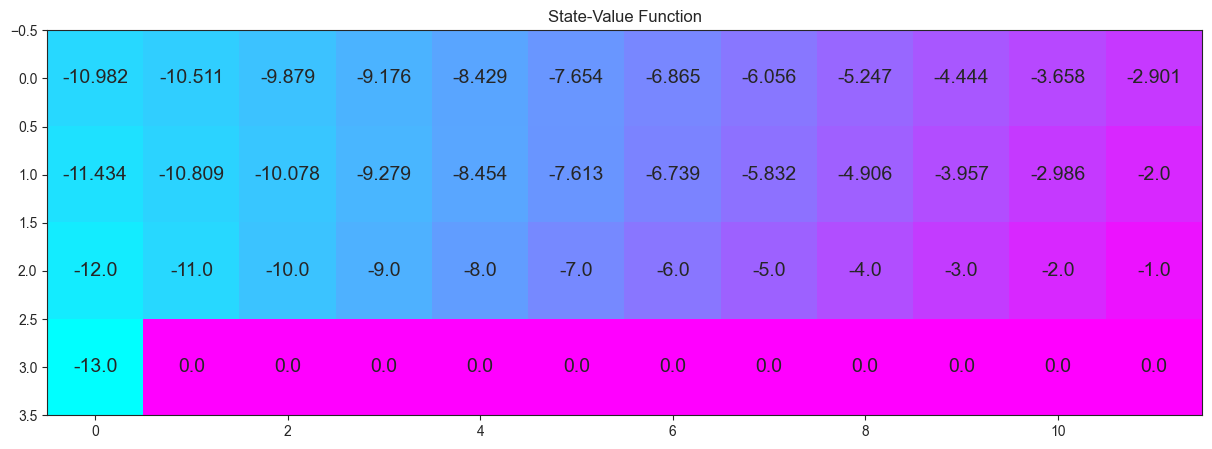

In [144]:
# obtain the estimated optimal policy and corresponding action-value function
Q_sarsamax = q_learning(env, 5000, .01)

# print the estimated optimal policy
policy_sarsamax = np.array([np.argmax(Q_sarsamax[key]) if key in Q_sarsamax else -1 for key in np.arange(48)]).reshape((4,12))
check_test.run_check('td_control_check', policy_sarsamax)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_sarsamax)

# plot the estimated optimal state-value function
plot_values([np.max(Q_sarsamax[key]) if key in Q_sarsamax else 0 for key in np.arange(48)])

### Part 3: TD Control: Expected Sarsa

In this section, you will write your own implementation of the Expected Sarsa control algorithm.

Your algorithm has four arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `num_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `alpha`: This is the step-size parameter for the update step.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).

The algorithm returns as output:
- `Q`: This is a dictionary (of one-dimensional arrays) where `Q[s][a]` is the estimated action value corresponding to state `s` and action `a`.

Please complete the function in the code cell below.

(_Feel free to define additional functions to help you to organize your code._)

In [148]:
def update_Qsa_expected_sarsa(alpha, gamma, Q, state, action, reward, next_state=None, policy=None):
    """Returns updated Q-value for the most recent experience."""
    # get current Q-value (for current state, action pair)
    current = Q[state][action]
    # max in Q[state]
    # element wise multiplication of Q[next_state] and policy

    Qsa_next = np.dot(Q[next_state], policy) if next_state is not None else 0
    # compute update
    target = reward + (gamma * Qsa_next)
    new_value = current + (alpha * (target - current))
    # return updated Q-value for current state and action pair
    return new_value

In [149]:
def expected_sarsa(env, num_episodes, alpha, eps_start=1.0, eps_decay=0.99, eps_min=0.1, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    for state in range(env.nS):
        for action in range(env.nA):
            Q[state][action] = 0
    # initialize performance monitor
    # loop over episodes
    epsilon = eps_start
    for i_episode in range(1, num_episodes+1):
        episode = []
        epsilon = max(epsilon * eps_decay, eps_min)
        reward = 0
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()   
        
        state, _ = env.reset()
        action = np.random.choice(np.arange(env.nA), p=e_greedy_policy(Q, epsilon, state, env.action_space))
        episode.append((state, action, reward))
        while True:
            next_state, reward, done, info, _ = env.step(action)
            policy = e_greedy_policy(Q, epsilon, next_state, env.action_space)
            Q[state][action] = update_Qsa_expected_sarsa(alpha, gamma, Q, state, action, reward, next_state, policy)
            next_action =  np.random.choice(np.arange(env.nA), p=policy)
            episode.append((next_state, next_action, reward))
            state = next_state
            action = next_action
            if done:
                break
    return Q

Use the next code cell to visualize the **_estimated_** optimal policy and the corresponding state-value function.  

If the code cell returns **PASSED**, then you have implemented the function correctly!  Feel free to change the `num_episodes` and `alpha` parameters that are supplied to the function.  However, if you'd like to ensure the accuracy of the unit test, please do not change the value of `gamma` from the default.

Episode 10000/10000

**<span style="color: red;">PLEASE TRY AGAIN</span>**


Estimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):
[[1 1 1 1 1 1 1 1 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 1 1 2]
 [0 0 3 0 0 0 0 0 0 0 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


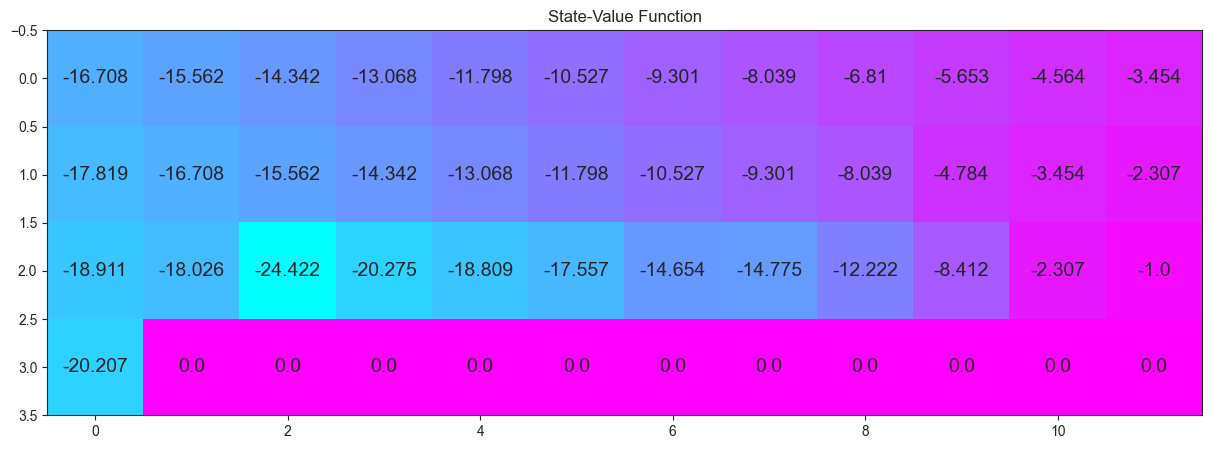

In [151]:
# obtain the estimated optimal policy and corresponding action-value function
Q_expsarsa = expected_sarsa(env, 10000, 1)

# print the estimated optimal policy
policy_expsarsa = np.array([np.argmax(Q_expsarsa[key]) if key in Q_expsarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_expsarsa)
print("\nEstimated Optimal Policy (UP = 0, RIGHT = 1, DOWN = 2, LEFT = 3, N/A = -1):")
print(policy_expsarsa)

# plot the estimated optimal state-value function
plot_values([np.max(Q_expsarsa[key]) if key in Q_expsarsa else 0 for key in np.arange(48)])